In [3]:
import pandas as pd
idx = pd.IndexSlice
import matplotlib.pyplot as plt
import numpy as np

# 1. International transactions--Monthly

- Foreign investors appear to have taken notice snapping up a net ¥6.4 TN in long-term Japanese bonds this year.


## 1.1 Import
- https://www.mof.go.jp/english/policy/international_policy/reference/itn_transactions_in_securities/index.htm
- 'https://www.mof.go.jp/policy/international_policy/reference/itn_transactions_in_securities/montha1.csv'

In [2]:
url = 'https://www.mof.go.jp/policy/international_policy/reference/itn_transactions_in_securities/montha1.csv'

df_month = pd.read_csv(url, 
                       header = [6, 8,10],
                       #usecols = range(1,20),
                       skipfooter = 7 ,
                       encoding =  "cp932" #'shift-jis' #"ISO-8859-2" #'unicode_escape' #"SHIFT-JIS" #'utf-8' #'unicode_escape',
                       #engine='python'
                      )
df_month.head(2)

<ipython-input-2-1347ae4106cc>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df_month = pd.read_csv(url,


,Portfolio Investment Assets,Unnamed: 1_level_0,Unnamed: 2_level_0,Unnamed: 3_level_0,Unnamed: 4_level_0,Unnamed: 5_level_0,Unnamed: 6_level_0,Unnamed: 7_level_0,Unnamed: 8_level_0,Unnamed: 9_level_0,...,Unnamed: 17_level_0,Unnamed: 18_level_0,Unnamed: 19_level_0,Unnamed: 20_level_0,Unnamed: 21_level_0,Unnamed: 22_level_0,Unnamed: 23_level_0,Unnamed: 24_level_0,Subtotal,Total
,Unnamed: 0_level_1,Unnamed: 1_level_1,Unnamed: 2_level_1,Equity and investment fund shares,Unnamed: 4_level_1,Unnamed: 5_level_1,Long-term debt securities,Unnamed: 7_level_1,Unnamed: 8_level_1,Subtotal,...,Long-term debt securities,Unnamed: 18_level_1,Unnamed: 19_level_1,Subtotal,Short-term debt securities,Unnamed: 22_level_1,Unnamed: 23_level_1,Total,Net,Net
,Unnamed: 0_level_2,Unnamed: 1_level_2,Unnamed: 2_level_2,Acquisition,Disposition,Net,Acquisition,Disposition,Net,Net (A),...,Acquisition,Disposition,Net,Net (B),Acquisition,Disposition,Net,Net (D),Unnamed: 25_level_2,Unnamed: 26_level_2
0,2005,１月,Jan,"9,934","8,428","1,506","89,060","83,172","5,888","7,394",...,"70,315","51,964","18,351","27,103","37,860","29,116","8,744","35,847","-19,709","-29,206"
1,(平成17年),２月,Feb,"12,092","12,401",-308,"88,691","95,167","-6,475","-6,784",...,"70,273","68,223","2,050","12,400","19,427","28,592","-9,166","3,234","-19,183","-11,023"


## 1.1 Forward fill year column

In [4]:
df_month.iloc[:, 0] = [x if len(str(x)) == 4 else np.nan for x in df_month.iloc[:, 0]]


df_month.iloc[:, 0] = df_month.iloc[:, 0].ffill()
df_month.head(2)
#df_month.iloc[:, 0] = df_month.iloc[:, 0]

,Portfolio Investment Assets,Unnamed: 1_level_0,Unnamed: 2_level_0,Unnamed: 3_level_0,Unnamed: 4_level_0,Unnamed: 5_level_0,Unnamed: 6_level_0,Unnamed: 7_level_0,Unnamed: 8_level_0,Unnamed: 9_level_0,...,Unnamed: 17_level_0,Unnamed: 18_level_0,Unnamed: 19_level_0,Unnamed: 20_level_0,Unnamed: 21_level_0,Unnamed: 22_level_0,Unnamed: 23_level_0,Unnamed: 24_level_0,Subtotal,Total
,Unnamed: 0_level_1,Unnamed: 1_level_1,Unnamed: 2_level_1,Equity and investment fund shares,Unnamed: 4_level_1,Unnamed: 5_level_1,Long-term debt securities,Unnamed: 7_level_1,Unnamed: 8_level_1,Subtotal,...,Long-term debt securities,Unnamed: 18_level_1,Unnamed: 19_level_1,Subtotal,Short-term debt securities,Unnamed: 22_level_1,Unnamed: 23_level_1,Total,Net,Net
,Unnamed: 0_level_2,Unnamed: 1_level_2,Unnamed: 2_level_2,Acquisition,Disposition,Net,Acquisition,Disposition,Net,Net (A),...,Acquisition,Disposition,Net,Net (B),Acquisition,Disposition,Net,Net (D),Unnamed: 25_level_2,Unnamed: 26_level_2
0,2005,１月,Jan,"9,934","8,428","1,506","89,060","83,172","5,888","7,394",...,"70,315","51,964","18,351","27,103","37,860","29,116","8,744","35,847","-19,709","-29,206"
1,2005,２月,Feb,"12,092","12,401",-308,"88,691","95,167","-6,475","-6,784",...,"70,273","68,223","2,050","12,400","19,427","28,592","-9,166","3,234","-19,183","-11,023"


## 1.2 FF column names

In [5]:
new_name_1 = [x.replace('Portfolio Investment','').lstrip() for x in df_month.columns.get_level_values(0).to_series().mask(lambda x: x.str.startswith('Unnamed')).ffill()]
new_name_2 = [x for x in df_month.columns.get_level_values(1).to_series().mask(lambda x: x.str.startswith('Unnamed')).ffill()]
new_name_1[:2]

['Assets', 'Assets']

In [6]:
df_month.columns = pd.MultiIndex.from_arrays([
            new_name_1,
            new_name_2,
            df_month.columns.get_level_values(2)])
df_month.head(2)

Assets                                        \
                 NaN                                         
  Unnamed: 0_level_2 Unnamed: 1_level_2 Unnamed: 2_level_2   
0               2005                 １月                Jan   
1               2005                 ２月                Feb   

                                                        \
  Equity and investment fund shares                      
                        Acquisition Disposition    Net   
0                             9,934       8,428  1,506   
1                            12,092      12,401   -308   

                                                          ...  \
  Long-term debt securities                     Subtotal  ...   
                Acquisition Disposition     Net  Net (A)  ...   
0                    89,060      83,172   5,888    7,394  ...   
1                    88,691      95,167  -6,475   -6,784  ...   

                Liabilities                               \
  Long-term debt securities                     Subtotal   
                Acquisition Disposition     Net  Net (B)   
0                    70,315      51,964  18,351   27,103   
1                    70,273      68,223   2,050   12,400   

                                                                    Subtotal  \
  Short-term debt securities                       Total                 Net   
                 Acquisition Disposition     Net Net (D) Unnamed: 25_level_2   
0                     37,860      29,116   8,744  35,847             -19,709   
1                     19,427      28,592  -9,166   3,234             -19,183   

                Total  
                  Net  
  Unnamed: 26_level_2  
0             -29,206  
1             -11,023  

[2 rows x 27 columns]

## 1.3  Drop na cols

In [7]:
mask = df_month.iloc[:,2].isna()
df_month = df_month.loc[~mask, :]
df_month.tail(2)

Assets                                        \
                   NaN                                         
    Unnamed: 0_level_2 Unnamed: 1_level_2 Unnamed: 2_level_2   
202               2021                11月                Nov   
203               2021                12月                Dec   

                                                           \
    Equity and investment fund shares                       
                          Acquisition Disposition     Net   
202                            77,365      83,501  -6,136   
203                               NaN         NaN     NaN   

                                                            ...  \
    Long-term debt securities                     Subtotal  ...   
                  Acquisition Disposition     Net  Net (A)  ...   
202                   379,181     381,839  -2,658   -8,794  ...   
203                       NaN         NaN     NaN      NaN  ...   

                  Liabilities                               \
    Long-term debt securities                     Subtotal   
                  Acquisition Disposition     Net  Net (B)   
202                   115,187      85,166  30,021   28,991   
203                       NaN         NaN     NaN      NaN   

                                                            \
    Short-term debt securities                       Total   
                   Acquisition Disposition     Net Net (D)   
202                    271,897     244,491  27,406  56,397   
203                        NaN         NaN     NaN     NaN   

               Subtotal               Total  
                    Net                 Net  
    Unnamed: 25_level_2 Unnamed: 26_level_2  
202             -37,785             -67,775  
203                 NaN                 NaN  

[2 rows x 27 columns]

## 1.4 Convert month str to number

In [8]:
from time import strptime
df_month.iloc[:,2] = [str(strptime(str(x),'%b').tm_mon) for x in df_month.iloc[:,2]]
df_month.head(2)

Assets                                        \
                 NaN                                         
  Unnamed: 0_level_2 Unnamed: 1_level_2 Unnamed: 2_level_2   
0               2005                 １月                  1   
1               2005                 ２月                  2   

                                                        \
  Equity and investment fund shares                      
                        Acquisition Disposition    Net   
0                             9,934       8,428  1,506   
1                            12,092      12,401   -308   

                                                          ...  \
  Long-term debt securities                     Subtotal  ...   
                Acquisition Disposition     Net  Net (A)  ...   
0                    89,060      83,172   5,888    7,394  ...   
1                    88,691      95,167  -6,475   -6,784  ...   

                Liabilities                               \
  Long-term debt securities                     Subtotal   
                Acquisition Disposition     Net  Net (B)   
0                    70,315      51,964  18,351   27,103   
1                    70,273      68,223   2,050   12,400   

                                                                    Subtotal  \
  Short-term debt securities                       Total                 Net   
                 Acquisition Disposition     Net Net (D) Unnamed: 25_level_2   
0                     37,860      29,116   8,744  35,847             -19,709   
1                     19,427      28,592  -9,166   3,234             -19,183   

                Total  
                  Net  
  Unnamed: 26_level_2  
0             -29,206  
1             -11,023  

[2 rows x 27 columns]

## 1.5 Set index --Combine year and month

In [9]:
df_month.index  = pd.to_datetime(df_month.iloc[:,0] + '-' + df_month.iloc[:,2], format='%Y-%m')
df_month.head(2)

Assets                                        \
                          NaN                                         
           Unnamed: 0_level_2 Unnamed: 1_level_2 Unnamed: 2_level_2   
2005-01-01               2005                 １月                  1   
2005-02-01               2005                 ２月                  2   

                                                                 \
           Equity and investment fund shares                      
                                 Acquisition Disposition    Net   
2005-01-01                             9,934       8,428  1,506   
2005-02-01                            12,092      12,401   -308   

                                                                   ...  \
           Long-term debt securities                     Subtotal  ...   
                         Acquisition Disposition     Net  Net (A)  ...   
2005-01-01                    89,060      83,172   5,888    7,394  ...   
2005-02-01                    88,691      95,167  -6,475   -6,784  ...   

                         Liabilities                               \
           Long-term debt securities                     Subtotal   
                         Acquisition Disposition     Net  Net (B)   
2005-01-01                    70,315      51,964  18,351   27,103   
2005-02-01                    70,273      68,223   2,050   12,400   

                                                                   \
           Short-term debt securities                       Total   
                          Acquisition Disposition     Net Net (D)   
2005-01-01                     37,860      29,116   8,744  35,847   
2005-02-01                     19,427      28,592  -9,166   3,234   

                      Subtotal               Total  
                           Net                 Net  
           Unnamed: 25_level_2 Unnamed: 26_level_2  
2005-01-01             -19,709             -29,206  
2005-02-01             -19,183             -11,023  

[2 rows x 27 columns]

## 1.6 Drop non data cols and convert data from string to int

In [10]:
df_month = df_month.drop(['Unnamed: 1_level_2', 'Unnamed: 0_level_2','Unnamed: 2_level_2'], axis=1, level=2)
df_month.head(2)

Assets                     \
           Equity and investment fund shares                      
                                 Acquisition Disposition    Net   
2005-01-01                             9,934       8,428  1,506   
2005-02-01                            12,092      12,401   -308   

                                                                   \
           Long-term debt securities                     Subtotal   
                         Acquisition Disposition     Net  Net (A)   
2005-01-01                    89,060      83,172   5,888    7,394   
2005-02-01                    88,691      95,167  -6,475   -6,784   

                                                           ...  \
           Short-term debt securities                      ...   
                          Acquisition Disposition     Net  ...   
2005-01-01                      8,289       9,042    -753  ...   
2005-02-01                      5,523       6,528  -1,005  ...   

                         Liabilities                               \
           Long-term debt securities                     Subtotal   
                         Acquisition Disposition     Net  Net (B)   
2005-01-01                    70,315      51,964  18,351   27,103   
2005-02-01                    70,273      68,223   2,050   12,400   

                                                                   \
           Short-term debt securities                       Total   
                          Acquisition Disposition     Net Net (D)   
2005-01-01                     37,860      29,116   8,744  35,847   
2005-02-01                     19,427      28,592  -9,166   3,234   

                      Subtotal               Total  
                           Net                 Net  
           Unnamed: 25_level_2 Unnamed: 26_level_2  
2005-01-01             -19,709             -29,206  
2005-02-01             -19,183             -11,023  

[2 rows x 24 columns]

In [11]:
df_month = df_month.dropna().replace(',','', regex=True).astype(int)
df_month.tail(3)

Assets                    \
           Equity and investment fund shares                     
                                 Acquisition Disposition   Net   
2021-09-01                             70015       68067  1948   
2021-10-01                             60096       59281   814   
2021-11-01                             77365       83501 -6136   

                                                                  \
           Long-term debt securities                    Subtotal   
                         Acquisition Disposition    Net  Net (A)   
2021-09-01                    468112      421772  46341    48288   
2021-10-01                    367137      362791   4346     5160   
2021-11-01                    379181      381839  -2658    -8794   

                                                         ...  \
           Short-term debt securities                    ...   
                          Acquisition Disposition   Net  ...   
2021-09-01                      22287       24345 -2058  ...   
2021-10-01                      26388       27526 -1138  ...   
2021-11-01                      23800       26384 -2584  ...   

                         Liabilities                              \
           Long-term debt securities                    Subtotal   
                         Acquisition Disposition    Net  Net (B)   
2021-09-01                     96580      110036 -13456   -26269   
2021-10-01                    100625      112493 -11869    13702   
2021-11-01                    115187       85166  30021    28991   

                                                                  \
           Short-term debt securities                      Total   
                          Acquisition Disposition    Net Net (D)   
2021-09-01                     242879      243567   -687  -26956   
2021-10-01                     267624      214959  52664   66366   
2021-11-01                     271897      244491  27406   56397   

                      Subtotal               Total  
                           Net                 Net  
           Unnamed: 25_level_2 Unnamed: 26_level_2  
2021-09-01               74558               73187  
2021-10-01               -8541              -62343  
2021-11-01              -37785              -67775  

[3 rows x 24 columns]

## 1.7 Divide to get trillion
- Units: 100 mill yen

In [12]:
df_month = df_month.divide(10000)
df_month.head(2)

Assets                      \
           Equity and investment fund shares                       
                                 Acquisition Disposition     Net   
2005-01-01                            0.9934      0.8428  0.1506   
2005-02-01                            1.2092      1.2401 -0.0308   

                                                                   \
           Long-term debt securities                     Subtotal   
                         Acquisition Disposition     Net  Net (A)   
2005-01-01                    8.9060      8.3172  0.5888   0.7394   
2005-02-01                    8.8691      9.5167 -0.6475  -0.6784   

                                                           ...  \
           Short-term debt securities                      ...   
                          Acquisition Disposition     Net  ...   
2005-01-01                     0.8289      0.9042 -0.0753  ...   
2005-02-01                     0.5523      0.6528 -0.1005  ...   

                         Liabilities                               \
           Long-term debt securities                     Subtotal   
                         Acquisition Disposition     Net  Net (B)   
2005-01-01                    7.0315      5.1964  1.8351   2.7103   
2005-02-01                    7.0273      6.8223  0.2050   1.2400   

                                                                   \
           Short-term debt securities                       Total   
                          Acquisition Disposition     Net Net (D)   
2005-01-01                     3.7860      2.9116  0.8744  3.5847   
2005-02-01                     1.9427      2.8592 -0.9166  0.3234   

                      Subtotal               Total  
                           Net                 Net  
           Unnamed: 25_level_2 Unnamed: 26_level_2  
2005-01-01             -1.9709             -2.9206  
2005-02-01             -1.9183             -1.1023  

[2 rows x 24 columns]

## 1.V Plot data

### 1.V.1 Plot libabilities (Foreign investment in Japan)

In [13]:
def plt_libs(df, start_year, security):
    df[start_year:].loc[:, idx['Liabilities',security,'Net']].rolling(12).mean().dropna().plot()

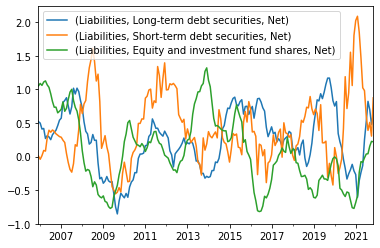

In [14]:
for col in ['Long-term debt securities', 'Short-term debt securities','Equity and investment fund shares']:
    plt_libs(df_month, '2000', col)
    plt.legend()

### 1.V.2 Plot assets (Japanese investment abroad)

In [15]:
def plt_asset(df, start_year, security):
    df[start_year:].loc[:, idx['Assets',security,'Net']].rolling(12).mean().dropna().plot()

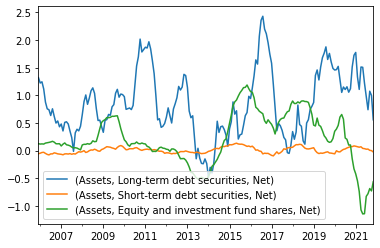

In [16]:
for col in ['Long-term debt securities', 'Short-term debt securities','Equity and investment fund shares']:
    plt_asset(df_month, '2000', col)
    plt.legend()

### 1.V.3 Long term debt

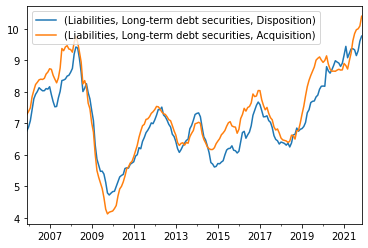

In [17]:
df_month.loc[:, idx['Liabilities','Long-term debt securities','Disposition']].rolling(12).mean().dropna().plot()
df_month.loc[:, idx['Liabilities','Long-term debt securities','Acquisition']].rolling(12).mean().dropna().plot()
plt.legend()